## LET'S GO PARTY

¡Estamos contentos! Esta asignatura ya termina y espero que todo  el mundo se lo haya pasado bien y saque buena nota. Por eso hemos decidido que el último examen tiene que ser una fiesta, ¿te apuntas?

 <img src="./images_notebook/fiesta.gif">
 
 Bueno, te he preguntado pero en realidad... no tienes más opción, así que...
 
  
 Comencemos.
 
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

In [1]:
%matplotlib inline
# GENERAL ONES FOR IMAGE ANALYSIS
import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage import io
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from time import time
### FACE DETECTION
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
from skimage.transform import integral_image

### FACE RECOGNITION
# Load the dataset
from sklearn.datasets import fetch_lfw_people 
# Classification and results
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

C:\Users\Fabio\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Ejercicio 1.

Toda buena fiesta tiene que tener música y la última canción de Shakira con Bizarrap está siendo un éxito. Lo cierto es que **el Biza lo peta en Ibiza** (chiste malo). Desde que comenzó esta asignatura, Bizarrap ha tenido un par de éxitos muy sonados por sus colaboraciones con otros artistas. Compartió micrófono con todo un poeta español del siglo XVII, recitando en versos alejandrinos aquello de "¡Quédate! ¡Quédate, que la noche sin ti duele!". Tuvo en su cabina a un Residente que comía *hot-dogs* sólo para divertise, con su amigo Balvin. ¡E incluso a un Villano Antillano!


Reconozcamos que las BZRP Music Sessions están convirtiéndose en un icono de un estilo de música... y ya vamos por la número 53. Pero, ¿sabrías reconocer a los 53 artistas que han pasado por la cabina de Bizarrap? Te adelanto que yo no.  Así que, para echarme una mano, he decidido automatizar el **reconocimiento de rostros** y así encontrar a las que son igualitas que tú... o que ellos. 

Bueno, en realidad he decidido que hagais el trabajo vosotros....

<img src='images_notebook/risa.gif'>

**Ex 1.1 (1 pt)** En primer lugar, partiendo de la carpeta  `./images_exam/`, leeremos las imágenes que se encuentran dentro de las subcarpetas correspondientes a `Bizarrap`, `NatiPeluso`, `Quevedo`, `Residente` y `Shakira`. Tened en cuenta que todas las imágenes habrán de tener el mismo tamaño para crear adecuadamente nuestro dataset, con lo cual haremos un resize a $100\times100$ pixels, y convertiremos a escala de grises.

**Muestra dos imagenes de cada uno de ellos**. Guarda todas las imágenes en un único array y genera el correspondiente array de etiquetas (labels array) (p.e. 0 para Bizarrap, 1 para NatiPeluso, etc.).


In [2]:
bzp = io.ImageCollection('./images_exam/Bizarrap/*')
nat = io.ImageCollection('./images_exam/NatiPeluso/*')
qvdo = io.ImageCollection('./images_exam/Quevedo/*')
residente = io.ImageCollection('./images_exam/Residente/*')
shakira = bzp = io.ImageCollection('./images_exam/Shakira/*')

In [3]:
bzp = [rgb2gray(resize(i,(100,100))) for i in bzp]
nat = [rgb2gray(resize(i,(100,100))) for i in nat]
qvdo = [rgb2gray(resize(i,(100,100))) for i in qvdo]
residente = [rgb2gray(resize(i,(100,100))) for i in residente]
shakira = [rgb2gray(resize(i,(100,100))) for i in shakira]

In [4]:
X = np.concatenate((bzp,nat,qvdo,residente,shakira))
y = np.concatenate(([0]*len(bzp),[1]*len(nat),[2]*len(qvdo),[3]*len(residente),[4]*len(shakira)))


**Ex 1.2 (0.5 pt)** Prepara las imágenes para realizar un PCA. Recuerda que, para ello, la imagen no puede ser 2D sino que hemos de transformarlas a un vector lineal. Después divide el conjunto entre train y test, en una proporcion 0.7/0.3.

In [5]:
X = np.reshape(X,(len(y),10000))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #obtain split train-test

**Ex 1.3 (0.5 pt)** Crea un modelo PCA y transforma los datos. Utiliza un número de componentes adecuado para preservar al menos el 95% de la información (0.95 de varianza acumulada).


In [6]:
pca = PCA(n_components=0.95,svd_solver='full') #create PCA
pca.fit(X_train) #fit the model

PCA(n_components=0.95, svd_solver='full')

**Ex 1.4 (1.5 pt)** Entrena un Adaboost para realizar el reconocimiento de rostros. Muestra los resultados utilizando la función `classification_report` y `confusion_matrix` del módulo `sklearn.metrics`.

In [7]:
transformed_train=pca.transform(X_train) #transform train
transformed_test=pca.transform(X_test) #transform test

clf = AdaBoostClassifier(n_estimators=150,learning_rate=0.01) #create adaboost classifier
clf.fit(transformed_train,y_train) #fit the model

print(classification_report(y_test,clf.predict(transformed_test))) 


              precision    recall  f1-score   support

           0       0.14      0.03      0.04        38
           1       0.59      0.88      0.71        25
           2       0.78      0.75      0.77        24
           3       0.76      0.87      0.81        30
           4       0.48      0.69      0.57        36

    accuracy                           0.60       153
   macro avg       0.55      0.64      0.58       153
weighted avg       0.52      0.60      0.54       153



In [8]:
print(confusion_matrix(y_test,clf.predict(transformed_test))) 

[[ 1  4  2  4 27]
 [ 0 22  1  2  0]
 [ 0  5 18  1  0]
 [ 0  4  0 26  0]
 [ 6  2  2  1 25]]


## Ejercicio 2

### Dance with me!

¿Os ha gustado la música? Pues si hay música tiene que haber baile. Y todos sabemos que el baile de moda lo protagoniza **Miercoles Adams**.

Como podreis ver en la imagen, esta fiesta ha congregado a muchisima gente y nosotros todavía estamos un poco paranoicos con eso del "aforo máximo". Con lo cual, hemos decidido crear un sistema automático para contar cuántas personas hay en la sala utilizando para ellos los histogramas **HOG**.

**EX 2.1 (0.5 pt)** Lee la imagen `images_notebook\template.png`. Imprime la información de la imagen (tamaño, tipo de datos, etc...). Calcula su HOG e **imprime el vector de características**. Por último, muestra la imagen `template` y la que devuelve la función `hog()`.

SHAPE: (135, 61, 3), TYPE: float64
[0.2399314  0.         0.         ... 0.01398755 0.02766937 0.02250882]


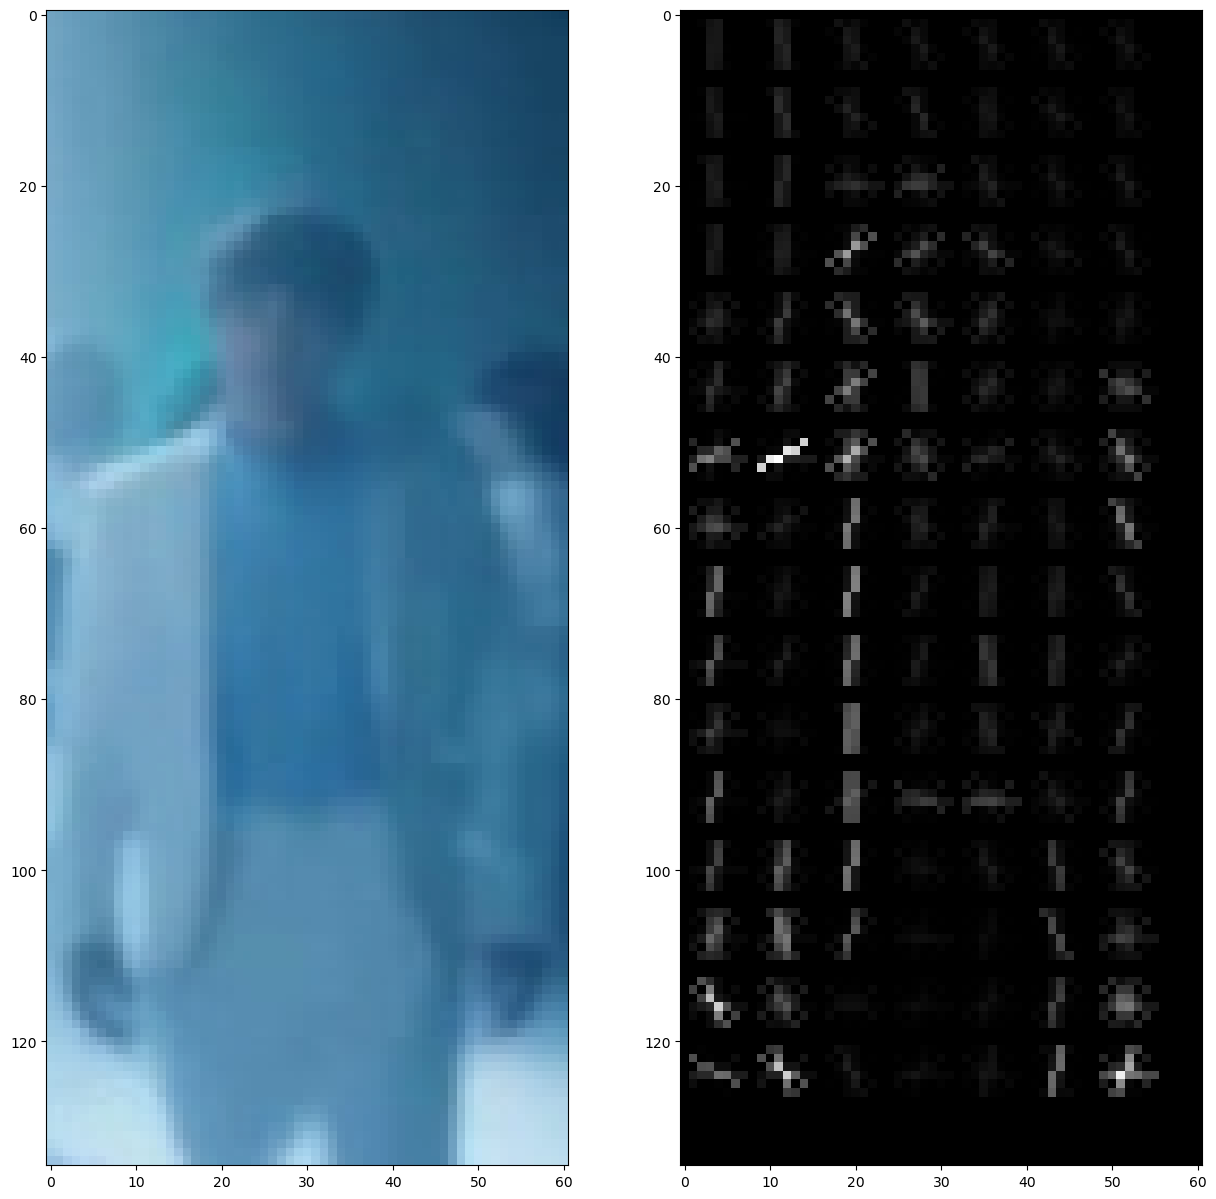

In [21]:
from skimage.feature import hog
from skimage import data, exposure

img = io.imread('images_notebook/template.png')
img = (rgba2rgb(img))

fd, hog_image_default = hog(img,visualize=True,channel_axis=-1,) #extract hog image and feature vector

print(f'SHAPE: {img.shape}, TYPE: {img.dtype}')
print(fd)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(hog_image_default,cmap='gray')

**Ex 2.2 (1.5pt)** Ahora lee la imagen `images_notebook/Miercoles_dance.jpg`. Vamos a crear una función que nos calcule la distancia entre el template y las regiones de la imagen, utilizando la distancia **Sum of Squared Differences (SSD)**. De un modo similar al realizado en clase, esta función nos devolverá una matriz (o imagen) de distancias. Sin embargo, en este caso **NO** nos intersa **sólamente un punto**, sino que vamos a utilizar un threshold para definir un conjunto de areas de alta similitud. De ese modo podremos saber cuántas personas hay en la habitación. Os dejo un ejemplo:

<img src='images_notebook\count_persons.png'>

Utiliza tu función para localizar al mayor número de personas posible. **Visualize la localización de todas las personas encontradas en la imagen y diga cuantas hay**

Como puedes ver, nuestros primeros resultados no son excepcionalmente buenos. ¿Por qué crees que nuestro "detector" localiza a unas personas y no a otras? Explica brevemente en que consiste un HOG y dime dónde estoy fallando.

**Nota:** Los resultados también van a cambiar según los parámetros que impongamos tanto en la función `hog()` como en el threshold de la matriz de distancia. Valores más pequeños del threshold pueden localizar más personas pero, a su vez, tener más falsos positivos.



In [22]:
target = io.imread('./images_notebook/Miercoles_dance.jpg')

def euclidean_distance(image, template):
    # Create a matrix to store distances, initialized with zeros.
    distances = np.zeros((image.shape[0] - template.shape[0], image.shape[1] - template.shape[1]))
    for i in range(image.shape[0] - template.shape[0]):
        for j in range(image.shape[1] - template.shape[1]):
            # Extract the region from the image that matches the size of the template
            region = image[i: i + template.shape[0], j: j + template.shape[1]] - template
            # Calculate the Euclidean distance between the region and the template and store it in the distances matrix
            distances[i][j] = np.sum(region**2)
    return distances

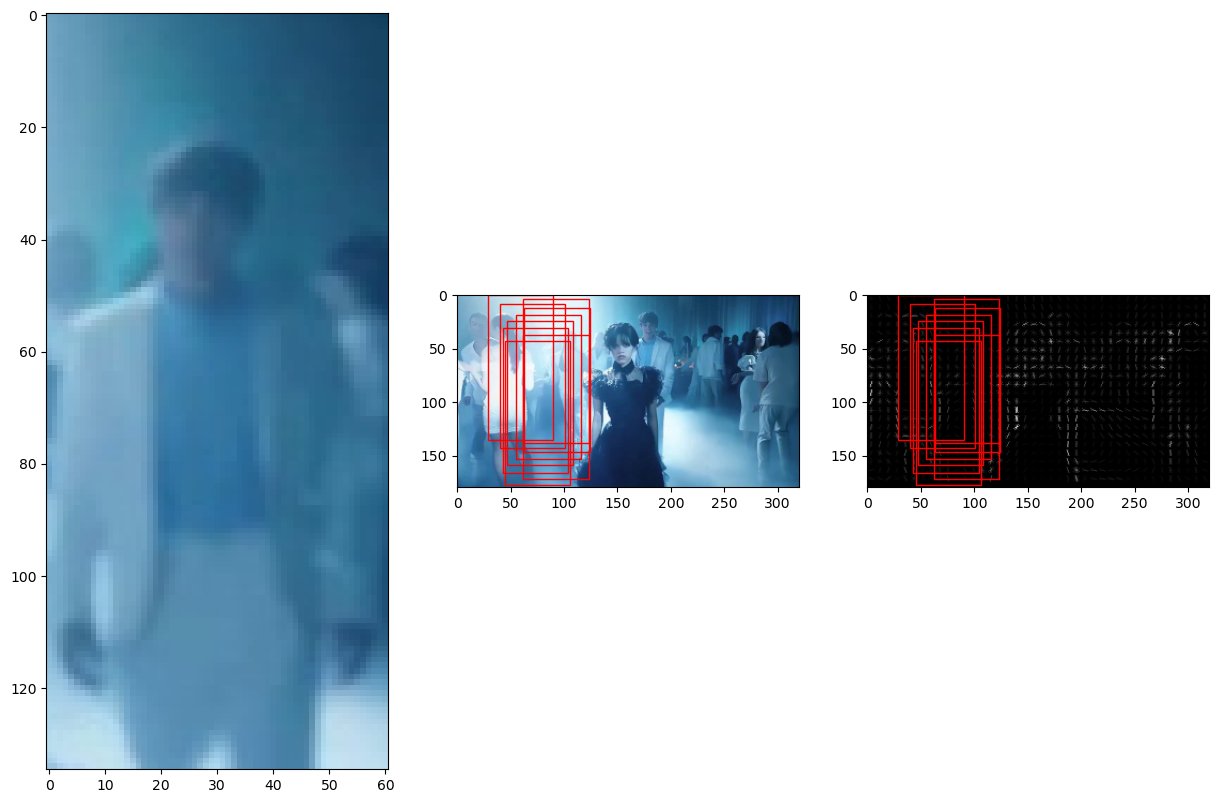

In [37]:
import matplotlib.patches as patches

fd2,hog2 =  hog(target,visualize=True,channel_axis=-1,)
dist = euclidean_distance(hog2,hog_image_default)
threshold = 80000

dist_thres = dist < threshold
idx = np.where(dist_thres == True)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,30))

for i in range(0,len(idx[0]),hog_image_default.shape[0]):
    rect = patches.Rectangle((idx[1][i],idx[0][i]), hog_image_default.shape[1], hog_image_default.shape[0],fill=False,edgecolor='r')
    ax[1].add_patch(rect)
    rect = patches.Rectangle((idx[1][i],idx[0][i]), hog_image_default.shape[1], hog_image_default.shape[0],fill=False,edgecolor='r')
    ax[2].add_patch(rect)


ax[0].imshow(img)    
ax[1].imshow(target)    
ax[2].imshow(hog2,cmap='gray')


In [38]:
dist.min()

55524.44140057092

**Ex 2.3 (1pt)** Como hemos dicho, nuestro detector de personas no es perfecto. Vamos a probar qué ocurre modificando el tamaño de nuestro template.

Haced un rescale del template a un tamaño mayor (1.2) de la imagen. Después probad vuestra función con este nuevo template. ¿Obtenemos resultados diferentes?

In [12]:
from skimage.transform import rescale
rtemplate = rescale(target,1.2)

# hacer lo mismo pero no se porq cojones no va

Qué ocurre si modificamos el tamaño del template?

Describe brevemente el HoG y qué otros valores pueden afectar a tu algoritmo.

## Ejercicio 3

Tanto baile me ha dado sed. Vamos a echar el último trago (por supuesto sin alcohol) antes de que acabe la fiesta.

**Ex 3.1 (1pt)** Lee la imagen `images_notebook\logo.png`. Utiliza el detector **ORB** para extraer un conjunto de puntos de la imagen y muestralos.

In [14]:
def get_gray_image(img):
    """
    Function used to obtain the grayscale image
    @param:
        img: input we want to grayscale
    @return: 
        img: grayscale image of img
    """
    if (img.shape[2]) > 3:
        img = rgba2rgb(img)
        img = rgb2gray(img)
        
    elif (img.shape[2]) == 3:
        img = rgb2gray(img)
        
    return img

Text(0.5, 1.0, 'ORB DETECTION')

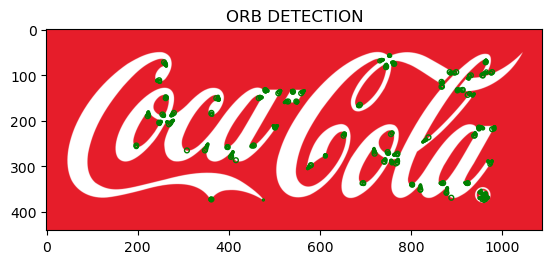

In [15]:
from skimage.feature import CENSURE
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.color import rgb2gray, rgba2rgb

img = io.imread('images_notebook/logo.png')
detector = ORB()
detector.detect_and_extract(get_gray_image(img))
plt.imshow(img, cmap='gray') #imshow
plt.scatter(detector.keypoints[:,1],detector.keypoints[:,0],2**detector.scales,facecolors='none',edgecolors='g') #plot keypints
plt.title('ORB DETECTION')

In [16]:
def get_ORB(img1,img2,_n_keypoints=200):
    
    img1 = get_gray_image(img1) #obtain grayscale img1
    img2 = get_gray_image(img2) #obtain grayscale img2
    
    descriptor_extractor = ORB(n_keypoints=_n_keypoints)  #define detector as ORB

    descriptor_extractor.detect_and_extract(img1) #extract keypoints and descriptor of img1
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img2) #extract keypoints and descriptor of img2
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors
    
    matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True,max_ratio=1) #obtain matches using both descriptors
 
    #show images
    fig, ax = plt.subplots(nrows=1, ncols=1)

    plt.gray()
    plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
    ax.axis('off')
    ax.set_title("Original Image vs. Transformed Image")

**Ex 3.2 (1.5pt)** Utiliza las imágenes de la carpeta `images_notebook\ColaLight\` para calcular su correspondencia con la imagen de template del apartado anterior, utilizando el detector ORB.

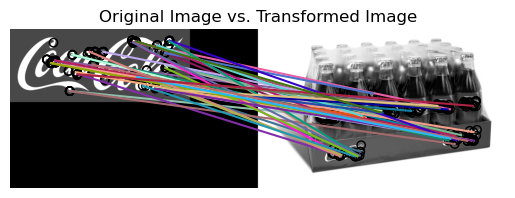

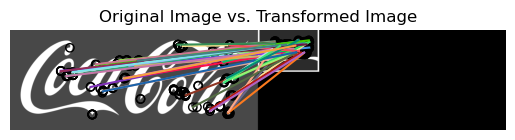

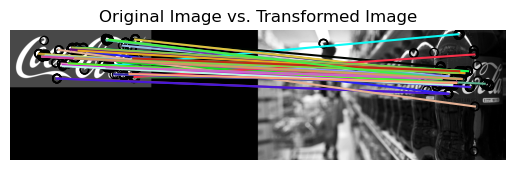

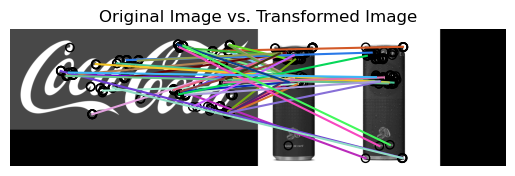

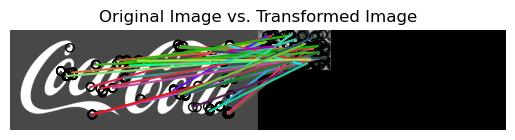

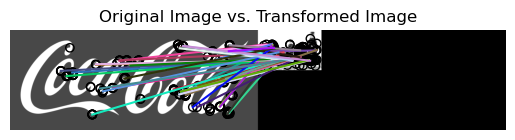

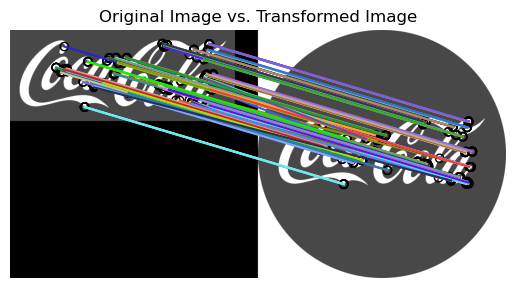

In [17]:
img2 = io.ImageCollection('images_notebook/ColaLight/*')
for i in range(len(img2)):
    get_ORB(img,img2[i])

**Ex 3.3 (1pt)** Aplica una transformación de rotación a la imagen de template y vuelve a realizar la correspondencia con las imágenes del apartado anterior. ¿Cambian mucho los resultados?

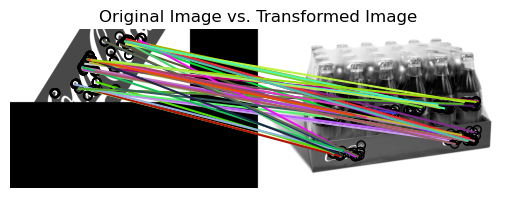

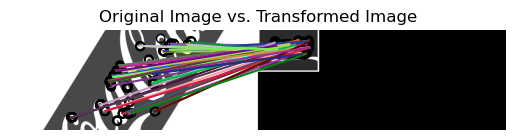

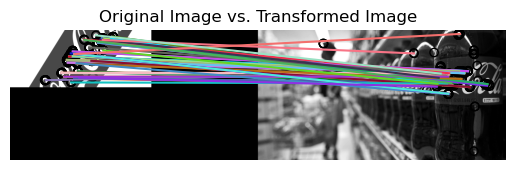

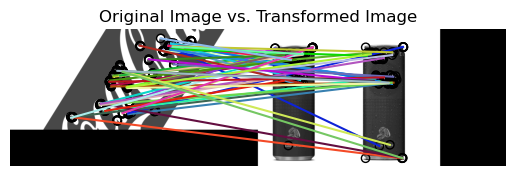

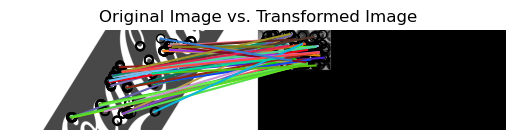

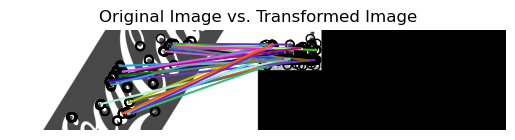

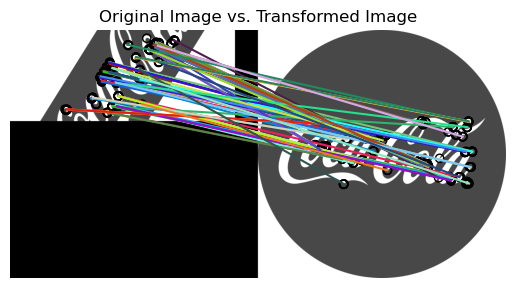

In [18]:
img2 = io.ImageCollection('images_notebook/ColaLight/*')
for i in range(len(img2)):
    get_ORB(skimage.transform.rotate(img,58),img2[i])